In [3]:
from methods import *
from function import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
data = np.loadtxt('data.txt')
x = data[:, 0]
y = data[:, 1]
print(x.shape , y.shape)

(200,) (200,)


In [5]:
h0 = np.mean(x)
k0 = np.mean(y)
alpha0 = 0.3
beta0 = 0.7
theta0 = 0.0

In [8]:
initial_params = np.array([h0 , k0 , alpha0 , beta0 , theta0])

In [9]:
initial_error = np.sum(ellipse_residual(initial_params , x ,y)**2)
print(initial_error)

83.00797672871721


In [10]:
gauss_newton_result , gauss_newton_iteration  , gauss_newton_history= gauss_newton(initial_params , x ,y )

Converged iteration 30


In [11]:
leven_marq_result , leven_marq_iter , leven_marq_history = leven_marq(initial_params, x ,y)

In [13]:
print("Gauss Nweton Cond Numbers (mean , std) : " , np.mean(gauss_newton_history['cond_numbers']) , np.std(gauss_newton_history['cond_numbers']))
gauss_newton_final_r = ellipse_residual(gauss_newton_result , x ,y)
gauss_newton_final_cost = np.sum(gauss_newton_final_r**2)
print("Final Cost :" ,gauss_newton_final_cost)
print("Leven Marq Cond Numbers (mean , std) : " , np.mean(leven_marq_history['cond_numbers']) , np.std(leven_marq_history['cond_numbers']))
leven_marq_final_r = ellipse_residual(leven_marq_result , x ,y)
leven_marq_final_cost = np.sum(leven_marq_final_r**2)
print("Final Cost :" , leven_marq_final_cost)

Gauss Nweton Cond Numbers (mean , std) :  3.3943724072617547 0.43817212315859805
Final Cost : 35.56307057728931
Leven Marq Cond Numbers (mean , std) :  3.388167989057257 0.45295539002857454
Final Cost : 35.563348109755154


# Visuluzation

In [14]:
def draw_ellipse(params, label, color , lw=1):
    t = np.linspace(0, 2*np.pi, 100)
    h, k, alpha, beta, theta = params
    x = h + alpha * np.cos(t) * np.cos(theta) - beta * np.sin(t) * np.sin(theta)
    y = k + alpha * np.cos(t) * np.sin(theta) + beta * np.sin(t) * np.cos(theta)
    plt.plot(x, y, label=label, color=color , lw=lw)


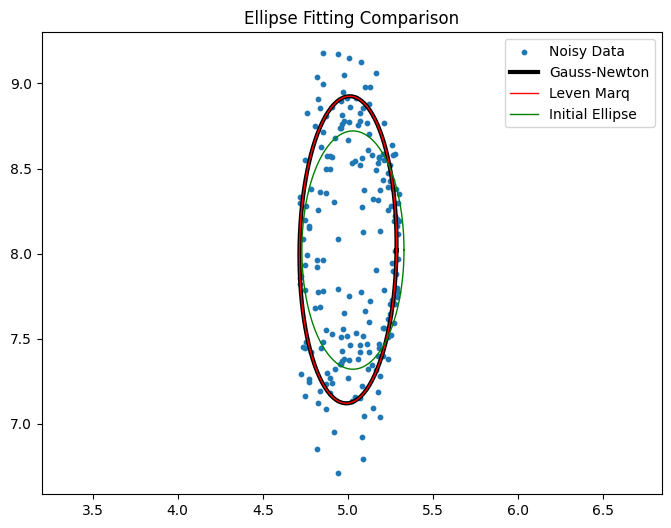

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, label='Noisy Data', s=10)
draw_ellipse(gauss_newton_result, "Gauss-Newton", "black" , lw=3)
draw_ellipse(leven_marq_result, "Leven Marq", "red")
draw_ellipse(initial_params , "Initial Ellipse" , "green")
plt.axis('equal')
plt.legend()
plt.title("Ellipse Fitting Comparison")
plt.show()